In [242]:
%config InlineBackend.figure_formats = ['svg']

This week I hit three small but satisfying milestones: I logged my 1,000th Peloton ride, I achieved my target body weight (again), and I completed five years of tracking my diet and exercise data. I didn't set out to make this some big quantified self-experiment. It started more as triage; a way to feel like I was regaining control of something after years of working on campaigns where control is the first thing to go.

In October 2020, as that presidential election approaching an end, I was running on fumes. I'd spent 494 days — usually seven days a week and often twelve hours a day — [working to defeat Donald Trump](https://matthodges.com/posts/2020-11-10-thank-you/). What's strange is that throughout the campaign I felt like I never had time to eat, and somehow I still gained weight. By the end I was the heaviest I'd ever been and completely drained. The bitter reality about campaign work is that the moment you finish the marathon, your job disappears. One day you're operating at full throttle; the next, you're unemployed with nothing but free time.

So I decided to channel it. I couldn't keep pretending my 20s metabolism was coming back, and I figured data might help where willpower hadn't. I wanted to treat my health like a project: something measurable, improvable, trackable. So I composed a little ecosystem of apps and devices to log everything: what I ate, how I exercised, how much water I drank, what I weighed. It was a nerd's approach to fitness, but it works for me.

This is my health app stack:

![My stack of health apps](health-stack.png)

Here's how it works:

[**Peloton**](https://www.onepeloton.com/) — This is the engine behind my workouts. I wasn't a sports kid in high school, and I never went to the gym in college or my 20s. I knew I couldn't rely on my own judgment or discipline here. Peloton works for me because the instructors design every workout, I like riding a stationary bike, and the entertainment value makes the time fly. The Bike and subscription aren't cheap (but neither are gym memberships), but they're absolutely worth it to me. I actually started with a bootleg setup: just the iOS app connected to a [Schwinn IC4](https://www.schwinnfitness.com/product/ic4-indoor-cycling-bike/100873.html). It worked surprisingly well until the IC4 started breaking down and needed hundreds of dollars in repairs. Upgrading to a proper Peloton Bike was a big step up.

[**LoseIt!**](https://www.loseit.com/) — One of the most popular diet-tracking apps. I'd tried [MyFitnessPal](https://www.myfitnesspal.com/) before and bounced right off it. The two apps are nearly identical, but somehow switching platforms was a psychological reset that made it click. LoseIt's food database is impressively accurate, the smart reminders to log meals actually help, and the ability to fine-tune calorie and nutrient goals is excellent. After experimenting with a few diet approaches, I've landed on what works best for me (not health advice for you!): stay a good clip below 2,000 calories a day, low carbs, and low sugar. A few years back, they ran a Thanksgiving sale offering lifetime premium access for a one-time payment; I jumped on it and haven't paid another dime since.

[**Water & Coffee**](https://apps.apple.com/us/app/water-coffee/id1475423483/) — A delightful little app that does exactly two things: track your water and track your caffeine. By the end of the 2020 campaign, I was drinking an entire pot of coffee a day and barely touching water. Logging both helped me cut my caffeine drastically (I'm down to about two cups a day) and reminded me to hydrate like an adult. The app is simple, free, privacy-respecting, and ad-free. I liked it so much I sent the developer a tip just to say thanks.

[**Apple Health**](https://www.apple.com/health/) — This is the data orchestration layer. I rarely open the app itself, but since everything connects through [HealthKit](https://developer.apple.com/documentation/healthkit), the data just flows. When I burn calories in Peloton, that data moves automatically into LoseIt without me touching a thing. It's nice having all the plumbing between these apps handled, and that the data ultimately lives inside my Apple account in my custody.

[**Todoist**](https://www.todoist.com/) —  Not technically a health app, but essential for keeping me consistent. Todoist's free tier is surprisingly powerful, and it's where I schedule all my workouts. I have a recurring project called *Weekly Exercise* that lays out the days and durations for each ride. Even before the recent AI boom, Todoist supported natural-language scheduling: you can type something like *#health 45 minute Peloton every Sunday*, and it automatically tags and repeats it for you. It’s simple, structured accountability.

Here's the thing about a stack: you have to actually use it. Over the past five years, I’ve had stretches of real success, and just as many where I let things slide. Every single backslide came down to the same cause: I stopped sticking to the system.

Life happens. You move, you change jobs, you buy a house, and suddenly there's an endless list of reasons not to eat well or work out. I'd go through phases where I stopped logging food altogether because I didn’t want to face the evidence; typing in pizza and beer only made me feel worse. Unsurprisingly, when I stopped tracking what I ate, I also stopped exercising as much. And just as predictably, that's when the weight crept back on.

The nice thing about having five years of data is that I can actually see it. Here's my weight over time ([I like to use PCHIP](https://matthodges.com/posts/2024-08-08-spline-pchip/)), shown as a percentage of my target weight:

In [243]:
from datetime import timedelta
import re
import matplotlib.pyplot as plt, matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy as np, pandas as pd
from scipy.interpolate import PchipInterpolator

In [244]:
df = pd.read_csv("data/weights.csv", parse_dates=["Date"])
df = df.loc[~df["Deleted"]].drop(columns=["Last Updated","Deleted"]).sort_values("Date")
tgt = 150.0
df["tgt_pct"] = df["Weight"] / tgt * 100

In [245]:
# x as numeric dates, strictly increasing
x = mdates.date2num(df["Date"].to_numpy())
y = df["tgt_pct"].to_numpy()

# PCHIP
pchip = PchipInterpolator(x, y)
x_smooth = np.linspace(x.min(), x.max(), 600)
y_smooth = pchip(x_smooth)

In [246]:
def vline_with_label(ax, date_str, label, y_at=100, dx_days=45, dy=3,
                     line_color="#e41a1c", arrow_color="#000000"):
    d_dt  = pd.Timestamp(date_str)
    d_num = mdates.date2num(d_dt)

    line_kw  = {"color":line_color,"linestyle":"-","linewidth":2, "alpha":0.6}
    text_kw  = {"fontsize":10,"ha":"left","va":"center","bbox":{"boxstyle":"round,pad=0.2","fc":"white","ec":"none"}}
    arrow_kw = {"arrowstyle":"->","color":arrow_color,"lw":1.0,
                "connectionstyle":"arc3,rad=-0.25","shrinkA":0,"shrinkB":4}

    ax.axvline(d_num, **line_kw)

    # place the label offset in time and y, then curve back to the line
    xy     = (d_num, y_at)  # point on the line to point at
    xytext = (mdates.date2num(d_dt + timedelta(days=dx_days)), y_at + dy)
    ax.annotate(label, xy=xy, xycoords="data", xytext=xytext, textcoords="data",
                arrowprops=arrow_kw, **text_kw)


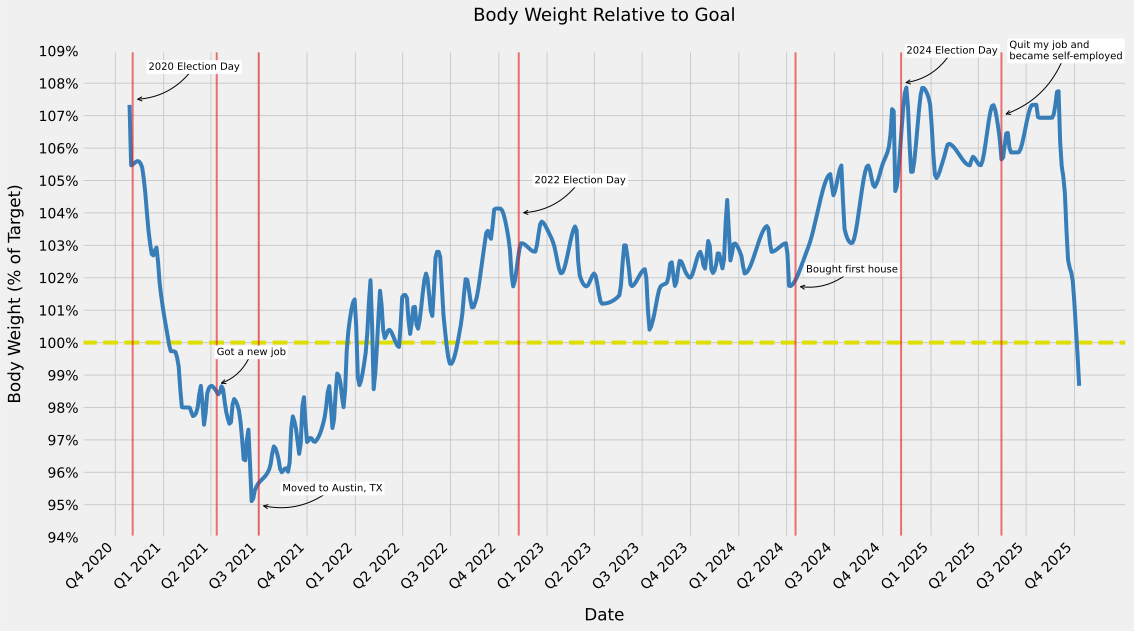

In [247]:
# set up figure
tgt_line_color = "#dede00"
weight_line_color = "#377eb8"
life_event_line_color = "#e41a1c"

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(16, 9))

# tgt line
ax.axhline(y=100.0, color=tgt_line_color, linestyle="--")

# weight line
ax.plot(mdates.num2date(x_smooth), y_smooth, color=weight_line_color)

# vertial lines
vline_with_label(ax, "2020-11-3", "2020 Election Day", y_at=107.5, dx_days=30, dy=1, line_color=life_event_line_color)
vline_with_label(ax, "2021-04-12", "Got a new job", y_at=98.7, dx_days=0, dy=1, line_color=life_event_line_color)
vline_with_label(ax, "2021-07-01", "Moved to Austin, TX", y_at=95, dx_days=45, dy=0.5, line_color=life_event_line_color)
vline_with_label(ax, "2022-11-8", "2022 Election Day", y_at=104, dx_days=30, dy=1, line_color=life_event_line_color)
vline_with_label(ax, "2024-04-18", "Bought first house", y_at=101.75, dx_days=20, dy=0.5, line_color=life_event_line_color)
vline_with_label(ax, "2024-11-5", "2024 Election Day", y_at=108, dx_days=10, dy=1, line_color=life_event_line_color)
vline_with_label(ax, "2025-05-15", "Quit my job and\nbecame self-employed", y_at=107, dx_days=15, dy=2, line_color=life_event_line_color)

# Create quarterly x-axis from smoothed values
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(
    lambda v, _: f"Q{((mdates.num2date(v).month-1)//3)+1} {mdates.num2date(v).year}"
))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
# drop the lingering 2026
ticks = [t for t in ax.get_xticks() if mdates.num2date(t).year < 2026]
ax.set_xticks(ticks)

# y axis as percents
y_min, y_max = ax.get_ylim()
ax.set_ylim(np.floor(y_min), np.ceil(y_max))
# place ticks every 1 exactly
ax.yaxis.set_major_locator(mticker.MultipleLocator(1))
# label as whole percents
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100, decimals=0))

# Axes and Title
ax.set_title("Body Weight Relative to Goal", fontsize=18, pad=30)
plt.xlabel("Date", labelpad=15)
plt.ylabel("Body Weight (% of Target)",labelpad=15)

# show
plt.tight_layout()
plt.show()

::: {.callout-tip}
Apple Health, Peloton, and LoseIt all let you export various data from your accounts. Peloton gives you a tidy CSV of all your workouts. LoseIt will give you a zip of lots data classes, also in CSV. Apple Health hands you gigabytes of XML, full of things like workouts, steps, weight, and even extremely granular heart-rate measurements.
:::

Pretty wild how much my weight lines up with life events! You can see how the abundant Austin nightlife impacted my habits, how the election cycles align with local maxima, and how the stresses of moving and a home purchase interfere with my goals. But these are the direct causes. Life stresses affect how much I'm exercising and how well I'm eating, which then affect my ability to lose or maintain weight. Where I see a quick drop in weight is also where I'm exercising the most, and sticking to my diet the best.

For me, diet, exercise, and quantitative metrics work!